# What is pandas?

pandas is one of the most popular open source data exploration libraries currently available. It gives its users the power to explore, query, transform, aggregate, and visualize **tabular** data. Tabular refers to data that is two-dimensional, consisting of rows and columns. Commonly, we refer to this organized structure of data as a **table**. pandas is the tool that we will use to analyze data in nearly every chapter of this book.

![1]

## Why pandas and not xyz?

In this current age of data explosion, there are now dozens of other tools that have many of the same capabilities as the pandas library. However, there are many aspects of pandas that make it an attractive choice for data analysis and it continues to have one of the fastest growing user bases.

* It's a Python library and integrates well with the other popular data science libraries such as numpy, scikit-learn, statsmodels, matplotlib, and seaborn.
* It is nearly self-contained in that lots of functionality is built into one package. This contrasts with R, where many packages are needed to obtain the same functionality.
* The community is excellent. Looking at Stack Overflow, for example, there are [many ten's of thousands of][2] pandas questions. If you need help, you are nearly guaranteed to find it quickly. 

### Why is it named after an East Asian bear?

The pandas library was begun by Wes McKinney in 2008 while working at the hedge fund AQR. In the financial world, it is common to refer to tabular data as 'panel data' which smashed together becomes pandas. If you are really interested in the history, hear it from the creator [himself][3].

### Python already has data structures to handle data, why do we need another one?

Even though Python is a high-level language, its primary built-in data structure to contain a sequence of values, lists, are not built for scientific computing. Lists are a general purpose data structure that can store any object of any type and are not optimized for tabular data analysis. Python lacks a built-in data structure that contains homogeneous data types for fast numerical computation. This data structure, usually referred to as an 'array' in most languages, is provided by the numpy third-party library.

### pandas is built directly on numpy

[numpy][4] ('numerical Python') is the most popular third-party Python library for scientific computing and forms the foundation for dozens of others, including pandas. numpy's primary data structure is an n-dimensional array which is much more powerful than a Python list and with much better performance for numerical operations.

All of the data in pandas is stored in numpy arrays. That said, it isn't necessary to know much about numpy when learning pandas. You can think of pandas as a higher-level, easier to use interface for doing data analysis than numpy. It is a good idea to eventually learn numpy, but for most data analysis tasks, pandas will be the right tool.

## pandas operates on tabular data

There are numerous formats for data, such as XML, JSON, CSV, Parquet, raw bytes, and many others. pandas has the capability to read in many different formats of data and always converts it to tabular form. pandas is built just for analyzing this rectangular, deceptively normal concept of data. pandas is not a suitable library for handling data in more than two-dimensions. It's focus is strictly on data that is one or two dimensions.

### The DataFrame and Series

The DataFrame and Series are the two primary pandas objects that we use throughout this book.

* **DataFrame** - A two-dimensional data structure that looks like any other rectangular table of data with rows and columns.
* **Series** - A single dimension of data. It is analogous to a single column of data or a one-dimensional array.

## pandas examples

The rest of this chapter contains examples of common data analysis tasks with pandas. There are one or two examples from each of the following major areas of the library:

* Reading data
* Filtering data
* Aggregating methods
* Non-Aggregating methods
* Aggregating within groups
* Cleaning data
* Joining data
* Time series analysis
* Visualization

The goal is to give you a broad overview of what pandas is capable of doing. You are not expected to understand the syntax, but rather, get a few ideas of what you can expect to accomplish when using pandas. Explanations will be brief, but hopefully provide just enough information so that you can understand the end result.

### The `head` method

Many of the last lines of code end with the `head` method. By default, this method returns the first five rows of the DataFrame or Series that calls it. The purpose of this method is to limit the output so that it easily fits on a screen or page in a book. If the `head` method is not used, then pandas displays the first and last 5 rows of data by default (or all the rows if the DataFrame has 60 or less). To reduce output even further (to save space on the screen), an integer (usually 3) will be passed to the `head` method. This integer controls the number of rows returned.

## Which pandas version to use?

The pandas library is under constant development and regularly releases new versions. Currently, pandas is on major version **1**, which was released in January, 2020. Before major version 1, pandas was on version **0**. Python libraries use the form **a.b.c** for version numbering where **a** represents the **major** version number. It is increased whenever there are major changes, with some being backward incompatible. **b** represents the **minor** version number and is incremented for smaller backward-compatible changes and enhancements. **c** represents the **micro** version number and is incremented mainly for bug fixes.

Often, only the major and minor version are written when speaking about the version of pandas as the micro version isn't all that important. pandas has a history of releasing around two or three minor versions per year. In order to run all of the code in this book, you need to be running **pandas 1.0** or greater.

### Import pandas and verify version number

Let's import pandas and verify it's version by accessing the special attribute `__version__`. If you are running any version of pandas less than 1.0 (such as 0.25 or below), then you'll need to exit the Jupyter Notebook, return to the command line and run `conda update pandas`.

[1]: images/pandas_logo.png
[2]: http://stackoverflow.com/questions/tagged/pandas
[3]: https://www.youtube.com/watch?v=kHdkFyGCxiY
[4]: http://www.numpy.org/

In [1]:
import pandas as pd
pd.__version__


'2.3.2'

## Reading data

Multiple datasets are used during the rest of this chapter. The `read_csv` function is able to read in data stored in plain text that is separated by a delimiter. By default, the delimiter is a comma. Below, we read in public bike usage data from the city of Chicago into a pandas DataFrame named `bikes`.

In [2]:
bikes = pd.read_csv('../data/bikes.csv')
bikes.head(3)

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
0,Male,2013-06-28 19:01:00,2013-06-28 19:17:00,993,Lake Shore Dr & Monroe St,11.0,Michigan Ave & Oak St,15.0,73.9,12.7,mostlycloudy
1,Male,2013-06-28 22:53:00,2013-06-28 23:03:00,623,Clinton St & Washington Blvd,31.0,Wells St & Walton St,19.0,69.1,6.9,partlycloudy
2,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,15.0,Dearborn St & Monroe St,23.0,73.0,16.1,mostlycloudy


## Filtering data

pandas can filter the rows of a DataFrame based on whether the values in that row meet a condition. For instance, we can select only the rides that had a `tripduration` greater than 5,000 (seconds).

### Single Condition

This example is a single condition that gets tested for each row. Only the rows that meet this condition are returned.

In [3]:
filt = bikes['tripduration'] > 5000
bikes[filt].head(3)

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
18,Male,2013-07-09 13:12:00,2013-07-09 14:42:00,5396,Canal St & Jackson Blvd,35.0,Millennium Park,35.0,79.0,13.8,cloudy
40,Female,2013-07-14 14:08:00,2013-07-14 15:53:00,6274,Wabash Ave & Roosevelt Rd,19.0,Lake Shore Dr & Monroe St,11.0,87.1,8.1,partlycloudy
77,Female,2013-07-21 11:35:00,2013-07-21 13:54:00,8299,State St & 19th St,15.0,Sheffield Ave & Kingsbury St,15.0,82.9,5.8,mostlycloudy


### Multiple Conditions

We can test for multiple conditions in a single row. The following example returns rides by females **and** have a `tripduration` greater than 5,000.

In [4]:
filt1 = bikes['tripduration'] > 5000
filt2 = bikes['gender'] == 'Female'
filt = filt1 & filt2
bikes[filt].head(3)

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
40,Female,2013-07-14 14:08:00,2013-07-14 15:53:00,6274,Wabash Ave & Roosevelt Rd,19.0,Lake Shore Dr & Monroe St,11.0,87.1,8.1,partlycloudy
77,Female,2013-07-21 11:35:00,2013-07-21 13:54:00,8299,State St & 19th St,15.0,Sheffield Ave & Kingsbury St,15.0,82.9,5.8,mostlycloudy
1954,Female,2013-12-28 11:37:00,2013-12-28 13:34:00,7050,LaSalle St & Washington St,15.0,Theater on the Lake,15.0,44.1,12.7,clear


The next example has multiple conditions but only requires that one of the conditions is true. It returns all the rows where either the rider is female **or** the `tripduration` is greater than 5,000.

In [5]:
filt = filt1 | filt2
bikes[filt].head(3)

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
9,Female,2013-07-04 15:00:00,2013-07-04 15:16:00,922,Lakeview Ave & Fullerton Pkwy,19.0,Racine Ave & Congress Pkwy,19.0,81.0,12.7,mostlycloudy
14,Female,2013-07-06 12:39:00,2013-07-06 12:49:00,610,Morgan St & Lake St,15.0,Aberdeen St & Jackson Blvd,15.0,82.0,5.8,mostlycloudy
18,Male,2013-07-09 13:12:00,2013-07-09 14:42:00,5396,Canal St & Jackson Blvd,35.0,Millennium Park,35.0,79.0,13.8,cloudy


### Using the `query` method

The `query` method provides an alternative and often more readable way to filter data than the above. All three filtering examples from above may be duplicated with `query`. A string representing the condition is passed to the `query` method to filter the data.

In [6]:
bikes.query('tripduration > 5000').head(3)

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
18,Male,2013-07-09 13:12:00,2013-07-09 14:42:00,5396,Canal St & Jackson Blvd,35.0,Millennium Park,35.0,79.0,13.8,cloudy
40,Female,2013-07-14 14:08:00,2013-07-14 15:53:00,6274,Wabash Ave & Roosevelt Rd,19.0,Lake Shore Dr & Monroe St,11.0,87.1,8.1,partlycloudy
77,Female,2013-07-21 11:35:00,2013-07-21 13:54:00,8299,State St & 19th St,15.0,Sheffield Ave & Kingsbury St,15.0,82.9,5.8,mostlycloudy


In [7]:
bikes.query('tripduration > 5000 and gender=="Female"').head(3)

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
40,Female,2013-07-14 14:08:00,2013-07-14 15:53:00,6274,Wabash Ave & Roosevelt Rd,19.0,Lake Shore Dr & Monroe St,11.0,87.1,8.1,partlycloudy
77,Female,2013-07-21 11:35:00,2013-07-21 13:54:00,8299,State St & 19th St,15.0,Sheffield Ave & Kingsbury St,15.0,82.9,5.8,mostlycloudy
1954,Female,2013-12-28 11:37:00,2013-12-28 13:34:00,7050,LaSalle St & Washington St,15.0,Theater on the Lake,15.0,44.1,12.7,clear


In [8]:
bikes.query('tripduration > 5000 or gender == "Female"').head(3)

,gender,starttime,stoptime,tripduration,from_station_name,start_capacity,to_station_name,end_capacity,temperature,wind_speed,events
9,Female,2013-07-04 15:00:00,2013-07-04 15:16:00,922,Lakeview Ave & Fullerton Pkwy,19.0,Racine Ave & Congress Pkwy,19.0,81.0,12.7,mostlycloudy
14,Female,2013-07-06 12:39:00,2013-07-06 12:49:00,610,Morgan St & Lake St,15.0,Aberdeen St & Jackson Blvd,15.0,82.0,5.8,mostlycloudy
18,Male,2013-07-09 13:12:00,2013-07-09 14:42:00,5396,Canal St & Jackson Blvd,35.0,Millennium Park,35.0,79.0,13.8,cloudy


## Aggregating methods

The technical definition of an **aggregation** is when a sequence of values is summarized by a **single** number. For example, `sum`, `mean`, `median`, `max`, and `min` are all examples of aggregation methods. By default, calling these methods on a pandas DataFrame applies the aggregation to each column. Below, we use a dataset containing San Francisco employee compensation information. Only a subset of the columns are initially read into the DataFrame.

In [9]:
cols = ['salaries', 'overtime', 'other salaries', 'retirement', 'health and dental']
sf_emp = pd.read_csv('../data/sf_employee_compensation.csv', usecols=cols)
sf_emp.head(3)

,salaries,overtime,other salaries,retirement,health and dental
0,71414.01,0.00,0.0,14038.58,12918.24
1,67941.06,0.00,0.0,13030.23,10047.52
2,116956.72,59975.43,19037.3,24796.44,15788.97


Calling the `mean` method returns the mean of each column. The result is then rounded to the nearest thousand.

In [10]:
sf_emp.mean()

salaries             53715.441133
overtime              4201.272687
other salaries        2816.296542
retirement           10484.755614
health and dental     9382.390735
dtype: float64

pandas allows you to aggregate rows as well. The `axis` parameter may be used to change the direction of the aggregation. This returns the total compensation for each employee.

In [11]:
sf_emp.sum(axis=1).head(3)

0     98370.83
1     91018.81
2    236554.86
dtype: float64

## Non-aggregating methods

There are methods that perform some calculation on the DataFrame that do not aggregate the data and usually preserve the shape of the DataFrame. For example, the `round` method rounds each number to a given decimal place. Here, we round each value in the DataFrame to the nearest thousand.

In [12]:
#using negative 3 with round figures to the nearest thousands

sf_emp.round(-3).head(3)

,salaries,overtime,other salaries,retirement,health and dental
0,71000.0,0.0,0.0,14000.0,13000.0
1,68000.0,0.0,0.0,13000.0,10000.0
2,117000.0,60000.0,19000.0,25000.0,16000.0


## Aggregating within groups

Above, we performed aggregations on the entire DataFrame. We can instead perform aggregations within groups of the data. Below we use an insurance dataset.

In [13]:
ins = pd.read_csv('../data/insurance.csv')
ins.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


One of the simplest aggregations is the frequency of occurrence of all the unique values within a single column. This is performed below with the `value_counts` method.

### Frequency of unique values in a single column

Here, we count the occurrence of each individual `region`.

In [14]:
ins['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

### Single aggregation function

Let's say we wish to find the mean charges for each of the unique values in the `sex` column. The `groupby` method creates groups based on the given grouping column before applying the aggregation. In this example, we return the mean charges for each sex.

In [15]:
ins.groupby('sex').agg(mean_charges=('charges','mean')).round(-3)

,mean_charges
sex,
female,13000.0
male,14000.0


### Multiple aggregation functions

pandas allows us to perform multiple aggregations at the same time. Below, we calculate the mean and max of the `charges` column as well as count the number of non-missing values.

In [16]:
ins.groupby('sex').agg(mean_charges=('charges', 'mean'),
                       max_charges=('charges', 'max'),
                       count_charges=('charges', 'count')).round(0)

,mean_charges,max_charges,count_charges
sex,,,
female,12570.0,63770.0,662
male,13957.0,62593.0,676


### Multiple grouping columns

pandas allows us to form groups based on multiple columns. In the below example, each unique combination of `sex` and `region` form a group. For each of these groups, the same aggregations as above are performed on the `charges` column.

In [17]:
ins.groupby(['sex', 'region']).agg(mean_charges=('charges', 'mean'),
                                   max_charges=('charges', 'max'),
                                   count_charges=('charges', 'count')).round(0)

mean_charges  max_charges  count_charges
sex    region                                             
female northeast       12953.0      58571.0            161
       northwest       12480.0      55135.0            164
       southeast       13500.0      63770.0            175
       southwest       11274.0      48824.0            162
male   northeast       13854.0      48549.0            163
       northwest       12354.0      60021.0            161
       southeast       15880.0      62593.0            189
       southwest       13413.0      52591.0            163

### Pivot Tables

We can reproduce the exact same output as above in a different shape with the `pivot_table` method. It groups and aggregates the same way as `groupby`, but places the unique values of one of the grouping columns as the new columns in the resulting DataFrame. Notice that pivot tables make for easier comparisons across groups.

In [20]:
pt = ins.pivot_table(index='sex', columns='region', 
                     values='charges', aggfunc='mean').round(0)
pt

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.0,12480.0,13500.0,11274.0
male,13854.0,12354.0,15880.0,13413.0


### Styling DataFrames

pandas enables you to style DataFrames in various ways to provide emphasis on particular cells. Below, the maximum value of each column is highlighted, a comma is added to separate the digits, and decimals are removed.

In [21]:
pt.style.highlight_max().format(r'{:,.0f}')

region,northeast,northwest,southeast,southwest
sex,,,,
female,"12,953","12,480","13,500","11,274"
male,"13,854","12,354","15,880","13,413"


## Cleaning data

Many datasets need to be cleaned before analyzed. pandas provides many tools to prepare data for further analysis.

### Options in the `read_csv` function

Below, we read in a new dataset on plane crashes. Notice all the question marks. They represent missing values, but pandas will read them in as strings.

In [22]:
pc = pd.read_csv('../data/tidy/planecrashinfo.csv')
pc.head(3)

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0,First U.S. dirigible Akron exploded just offsh...


The `read_csv` function has dozens of options to help read in messy data. One of the options allows you to convert a particular string to missing values. Notice that all of the question marks are now labeled as `NaN` (not a number).

In [23]:
pc = pd.read_csv('../data/tidy/planecrashinfo.csv', na_values='?')
pc.head(3)

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,"September 17, 1908",17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0.0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0.0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0.0,First U.S. dirigible Akron exploded just offsh...


### String manipulation

Often times there is data trapped within a string column that you will need to extract. The `aboard` column appears to have three distinct pieces of information; the total number of people on board, the number of passengers, and the number of crew.

In [24]:
aboard = pc['aboard']
aboard.head()

0     2  (passengers:1 crew:1)
1     1  (passengers:0 crew:1)
2     5  (passengers:0 crew:5)
3     1  (passengers:0 crew:1)
4    20  (passengers:? crew:?)
Name: aboard, dtype: object

pandas has special functionality for manipulating strings. Below, we use a regular expression to extract the pertinent numbers from the `aboard` column.

In [25]:
aboard.str.extract(r'(\d+)?\D*(\d+)?\D*(\d+)?').head()

,0,1,2
0,2,1,1
1,1,0,1
2,5,0,5
3,1,0,1
4,20,NaN,NaN


### Reshaping into tidy form

Occasionally, you will have several columns of data that all belong in a single column. Take a look at the DataFrame below on the average arrival delay of airlines at different airports. All of the columns with three-letter airport codes could be placed in the same column as they all contain the arrival delay which has the same units.

In [26]:
aad = pd.read_csv('../data/tidy/average_arrival_delay.csv').head()
aad

,airline,ATL,IAH,LAX,SFO
0,AA,4,11,3,3
1,DL,0,3,3,0
2,UA,5,9,4,5


The `melt` method stacks columns one on top of the other. Here, it places all of the three-letter airport code columns into a single column. The first two airports (ATL and DEN) are shown below in the new tidy DataFrame.

In [27]:
aad.melt(id_vars='airline', var_name='airport', value_name='delay').head(10)

,airline,airport,delay
0,AA,ATL,4
1,DL,ATL,0
2,UA,ATL,5
3,AA,IAH,11
4,DL,IAH,3
5,UA,IAH,9
6,AA,LAX,3
7,DL,LAX,3
8,UA,LAX,4
9,AA,SFO,3


## Joining Data

pandas can join multiple DataFrames together by matching values in one or more columns. If you are familiar with SQL, then pandas performs joins in a similar fashion. Below, we make a connection to a database and read in two of its tables.

In [28]:
from sqlalchemy import create_engine, inspect
engine = create_engine('sqlite:///../data/databases/neurIPS.db')

inspector = inspect(engine)

tables = inspector.get_table_names()

authors = pd.read_sql('Authors', engine)
pa = pd.read_sql('PaperAuthors', engine)

In [29]:
tables

['Authors', 'PaperAuthors', 'Papers']

Output the first three rows of each DataFrame.

In [30]:
authors.head(3)

,Id,Name
0,178,Yoshua Bengio
1,200,Yann LeCun
2,205,Avrim Blum


In [31]:
pa.head(3)

,Id,PaperId,AuthorId
0,1,5677,7956
1,2,5677,2649
2,3,5941,8299


We can now join these tables together using the `merge` method. The `AuthorID` column from the `pa` table is aligned with the `Id` column of the `authors` table.

In [32]:
pa.merge(authors, how='left', left_on='AuthorId', right_on='Id').head(3)

,Id_x,PaperId,AuthorId,Id_y,Name
0,1,5677,7956,7956,Nihar Bhadresh Shah
1,2,5677,2649,2649,Denny Zhou
2,3,5941,8299,8299,Brendan van Rooyen


## Time Series Analysis

One of the original purposes of pandas was to do time series analysis. Below, we read in 20 years of Microsoft's closing stock price data.

In [33]:
msft = pd.read_csv('../data/stocks/msft20.csv', parse_dates=['date'], index_col='date')
msft.head()

,open,high,low,close,adjusted_close,volume,dividend_amount
date,,,,,,,
1999-10-19,88.250,89.250,85.250,86.313,27.8594,69945600,0.0
1999-10-20,91.563,92.375,90.250,92.250,29.7758,88090600,0.0
1999-10-21,90.563,93.125,90.500,93.063,30.0381,60801200,0.0
1999-10-22,93.563,93.875,91.750,92.688,29.9171,43650600,0.0
1999-10-25,92.000,93.563,91.125,92.438,29.8364,30492200,0.0


### Select a period of time

pandas allows us to easily select a period of time. Below, we select all of the trading data from February 27, 2017 through March 2, 2017.

In [34]:
msft['2017-02-27':'2017-03-02']

,open,high,low,close,adjusted_close,volume,dividend_amount
date,,,,,,,
2017-02-27,64.54,64.54,64.045,64.23,61.4355,15871500,0.0
2017-02-28,64.08,64.20,63.760,63.98,61.1964,23239800,0.0
2017-03-01,64.13,64.99,64.022,64.94,62.1146,26937500,0.0
2017-03-02,64.69,64.75,63.880,64.01,61.2251,24539600,0.0


### Group by time

We can group by some length of time. Here, we group together every month of trading data and return the average closing price of that month.

In [35]:
msft_mc = msft.resample('M').agg({'close':'mean'})
msft_mc.head(3)

C:\Users\nealv\AppData\Local\Temp\ipykernel_29776\1310425038.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  msft_mc = msft.resample('M').agg({'close':'mean'})


,close
date,
1999-10-31,91.382222
1999-11-30,89.463762
1999-12-31,106.190545


## Visualization

pandas provides basic visualization abilities by giving its users a few default plots. Below, we plot the average monthly closing price of Microsoft for the last 20 years.

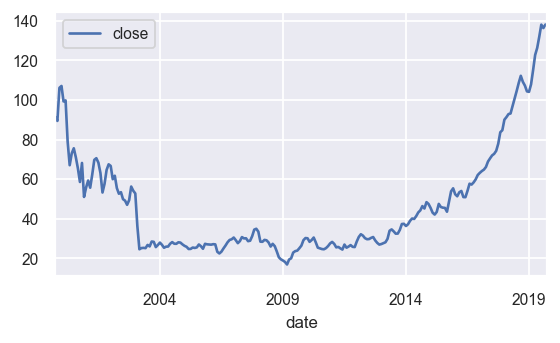

In [36]:
import seaborn as sns
sns.set_theme(rc={'figure.figsize': (5, 2.7), 'figure.dpi': 127}, 
              font_scale=0.8)
msft_mc.plot(kind='line');

Below, we create a box plot of the average arrival delay by airport.

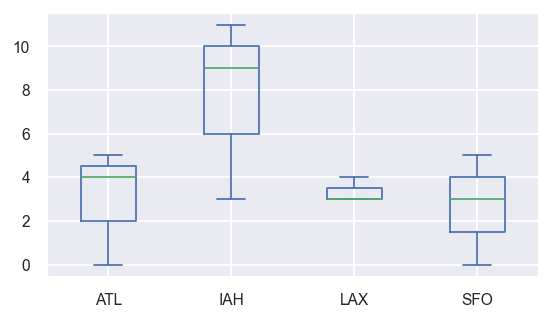

In [37]:
aad.plot(kind='box');

The pivot table of average insurance cost by region and sex is made into a bar graph.

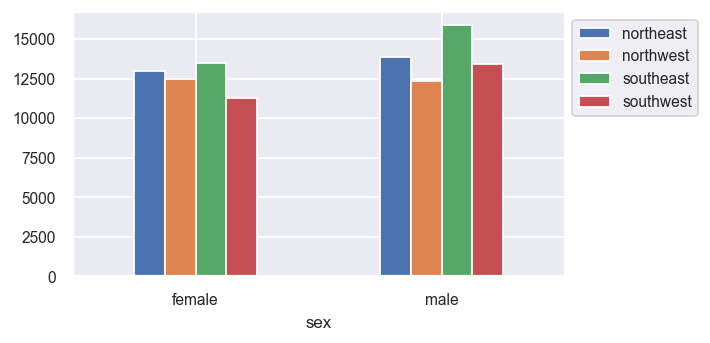

In [58]:
pt.plot(kind='bar', rot=0).legend(bbox_to_anchor=(1, 1), loc='upper left');

## Much More

This chapter contained a small sampling from many of the major sections of the pandas library. The rest of the book focuses on going into great detail on how to effectively use the pandas library to complete nearly any kind of data analysis.